In [2]:
# Import
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
# Install the 'pmdarima' package
#import sys
#!{sys.executable} -m pip install pmdarima

In [4]:
# Read the csv into 'df'
df = pd.read_csv('/home/stephen/Desktop/ForecastingCaseStudy/SalesProduct1.csv')

In [5]:
# Format the 'Month' column to YYYY-MM-DD & set the 'Month' column data type to 'datetime64[ns]'
month_list = list()
for x in range(len(df)):
    month_list.append(df.iloc[x]['Month'])

df2 = pd.DataFrame({'Month': month_list})
df2['Month'] = pd.to_datetime(df2['Month']).dt.strftime('%Y-%m-%d')
df2['Sales Product 1'] = df['Sales Product 1']

df2['Month'] = df2['Month'].astype('datetime64[ns]')

In [6]:
# Set the 'Month' column as the index of 'df2'
df2.set_index('Month', inplace=True)

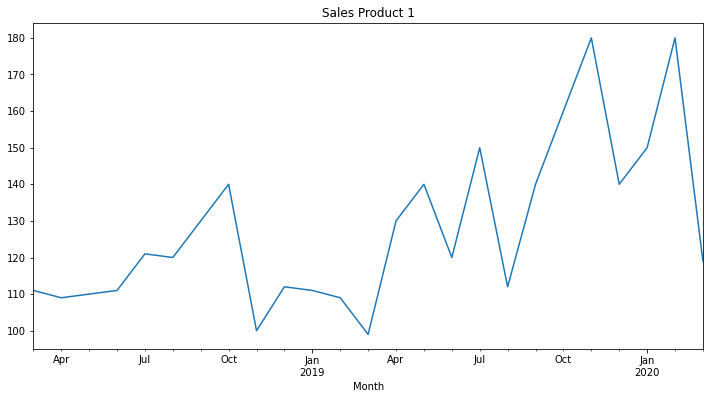

In [41]:
# Plot the time series to see if it is additive or multiplicative
plot = df2.plot(figsize=(12,6), title='Sales Product 1', legend=False)

# Save the plot to a PNG
fig = plot.get_figure()
fig.savefig('SalesProduct1_PlotA.png')

The time series is multiplicative because the peaks & troughs do not stay roughly the same across the level.

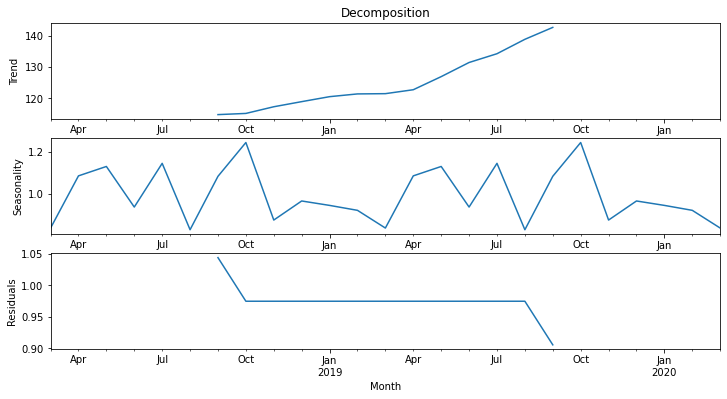

In [38]:
# Decompose the time series into trend, seasonal & residual components
decompose_result = seasonal_decompose(df2, model="multiplicative")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residuals = decompose_result.resid

# Plot the decomposition
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,6))
trend.plot(ax=ax1, title='Decomposition')
ax1.set_ylabel('Trend')
seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonality')
residuals.plot(ax=ax3)
ax3.set_ylabel('Residuals')

# Save the decomposition plots to a PNG
fig.savefig('SalesProduct1_PlotB_Decomposition.png')

# ARIMA

In [11]:
# Augmented Dickey-Fuller test to test for stationarity
adf_test = ADFTest(alpha = 0.05) # 0.05 is the significance level
adf_test.should_diff(df2)

(0.5849799886671274, True)

The results are the p-value & whether the time series is stationary or not. True = stationary. False = not stationary.

In [12]:
# Create the training & testing subsets
train = df2[0:19]
test = df2[19:]

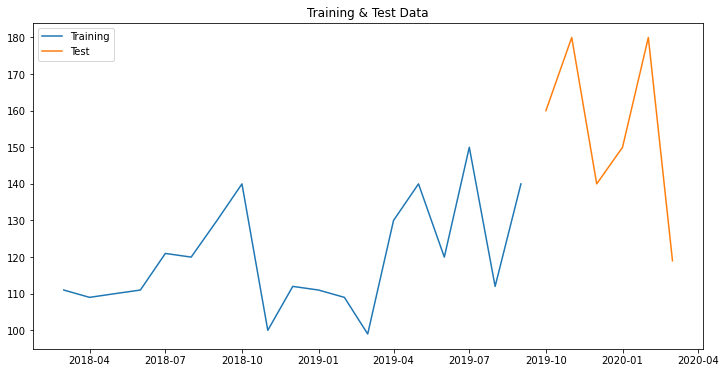

In [13]:
# Plot the 'train' & 'test' subsets
plt.figure(figsize=(12,6))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.title('Training & Test Data')
plt.legend(loc="upper left")
plt.show()

In [14]:
##### IGNORE THIS CELL #####

# Create a differenced dataframe to see if the time series can become stationary with 99% confidence
#diff = list()
#for i in range(1, len(df_prod['Sales Product 1'])):
#    value = df_prod['Sales Product 1'][i] - df_prod['Sales Product 1'][i - 1]
#    diff.append(value)
#df_diff = pd.DataFrame(diff, columns=['Differenced'])

# Plot the differenced dataframe
#df_diff.plot()

In [15]:
##### IGNORE THIS CELL #####

#Log-tranformation to de-trend the time series to see if it can become stationary with 99% confidence
#df_prod_log = pd.DataFrame(index=df_prod.index)
#df_prod_log['log'] = np.log(df_prod['Sales Product 1'])

#Plot the log-transformed dataframe
#df_prod_log.plot()

In [16]:
##### IGNORE THIS CELL #####

# Deflate the time series (perform a regression then subtract the regression from the original time series)
#x, y = np.arange(len(trend.trend.dropna())), trend.trend.dropna()
#x = sm.add_constant(x)
#model = OLS(y, x)
#res = model.fit()
#print(res.summary())
#fig, ax = plt.subplots(1, 2, figsize=(12,6))
#ax[0].plot(decomposition.trend.dropna().values, label='trend')
#ax[0].plot([res.params.x1*i + res.params.const for i in np.arange(len(decomposition.trend.dropna()))])
#ax[1].plot(res.resid.values)
#ax[1].plot(np.abs(res.resid.values))
#ax[1].hlines(0, 0, len(res.resid), color='r')
#ax[0].set_title("Trend and Regression")
#ax[1].set_title("Residuals")

# Use this cell for other Sales Products Notebooks

The data is not stationary, so you need to detrend it & remove seasonality to make it stationary so your model is more accurate.

You no longer need to plot the ACF or the PACF because you are using auto-ARIMA via the 'pmdarima' package.

In [17]:
# Autocorrelation function
#plot_acf(df_prod['Sales Product 1'], lags=8)

In [18]:
# Partial autocorrelation function
#plot_pacf(df_prod['Sales Product 1'], lags=8)

----- IGNORE THIS CELL -----

Since df_prod has an upward linear trend & is stationary with 95% confidence, you could create an ARMA model. But, the PACF only has 1 highly correlated point & the ACF doesn't have any strongly correlated points, so the ARMA model would just be ARMA(1, 0) which is an AR model. So, create an AR model.

In [19]:
# Use the ARIMA function but set q & d equal to zero to get an AR(1) model.
#model = ARIMA(df_prod['Sales Product 1'], order=(1,0,0))
#model_fit = model.fit()
#print(model_fit.summary())

In [20]:
# Line plot of residuals
#residuals = pd.DataFrame(model_fit.resid)
#residuals.plot()

In [21]:
# Summary stats of residuals
#print(residuals.describe())

In [22]:
# Create train & test sets
#train = df_prod['Sales Product 1']
#test = df2[19:]
#test.index = range(len(test))
#history = [x for x in train]

# Create an empty list to store the predictions
#predictions = list()

In [23]:
# Create predictions
#for t in range(len(test)):
#    model = ARIMA(history, order=(1,0,0))
#    model_fit = model.fit()
#    output = model_fit.forecast()
#    yhat = output[0]
#    predictions.append(yhat)
#    obs = test['Sales Product 1'][t]
#    history.append(obs)
#    print('predicted=%f, actual=%f' % (yhat, obs))

In [24]:
# Plot forecasts against actual outcomes
#plt.plot(test['Sales Product 1'])
#plt.plot(predictions, color='red')

In [25]:
# Evaluate forecast using mean absolute error
#MAE = mean_absolute_error(test['Sales Product 1'], predictions)
#MAE_rounded = round(MAE, 3)

# Evaluate forecast using root mean squared error
#RMSE = mean_squared_error(test['Sales Product 1'], predictions, squared=False)
#RMSE_rounded = round(RMSE, 3)

# Evaluate forecast using mean absolute percentage error
#def mape(actuals, preds): 
#    a, p = np.array(actuals), np.array(preds)
#    return np.mean(np.abs((a - p) / a)) * 100
#MAPE = mape(test['Sales Product 1'], predictions)
#MAPE_rounded = round(MAPE, 3)
#MAPE_string = str(MAPE_rounded) + '%'

# Evaluate forecast using mean absolute scaled error (w/non-seasonal naive forecast)
#def mase(y_test, y_pred, y_naive):
#    e_t = y_test - y_pred
#    scale = mean_absolute_error(y_test, y_naive)
#    return np.mean(np.abs(e_t / scale))
#MASE = mase(test['Sales Product 1'], predictions, df2['Sales Product 1'][18:24])
#MASE_rounded = round(MASE, 3)

# Create a dataframe containing all the error calculations
#pred_list = ['predictions']
#df_errors = pd.DataFrame({'-':pred_list})
#df_errors['MAE'] = MAE_rounded
#df_errors['RMSE'] = RMSE_rounded
#df_errors['MAPE'] = MAPE_string
#df_errors['MASE'] = MASE_rounded
#df_errors

In [26]:
# Run 'auto_arima'.
# All the paramaters you will need, even for other time series, are included here.
# Read more about the parameters here: https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html
arima_model = auto_arima(train, start_p=0, d=0, start_q=0,
                        max_p=5, max_d=0, max_q=5,
                        start_P=0, D=0, start_Q=0,
                        max_P=5, max_D=5, max_Q=5,
                        max_order=None, m=12, seasonal=True,
                        stationary=True, method='lbfgs', 
                        error_action='warn', trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=158.854, Time=0.78 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=162.753, Time=0.19 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=162.722, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=238.028, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=160.805, Time=0.07 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=160.805, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=162.806, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=160.776, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=160.803, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=162.547, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.379 seconds


In [27]:
# View the model summary
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   19
Model:                        SARIMAX   Log Likelihood                 -77.427
Date:                Sat, 10 Apr 2021   AIC                            158.854
Time:                        11:02:12   BIC                            160.743
Sample:                             0   HQIC                           159.174
                                 - 19                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    119.7368      3.822     31.332      0.000     112.247     127.227
sigma2       202.8255     97.114      2.089      0.037      12.486     393.165
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.51
Prob(Q):                              0.77   Prob(JB):                         0.47
Heteroskedasticity (H):               5.22   Skew:                             0.58
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# Forecast/make predictions
pred = pd.DataFrame(arima_model.predict(n_periods=6), index=test.index)
pred.columns = ['predicted_sales']
pred

,predicted_sales
Month,
2019-10-01,119.736842
2019-11-01,119.736842
2019-12-01,119.736842
2020-01-01,119.736842
2020-02-01,119.736842
2020-03-01,119.736842


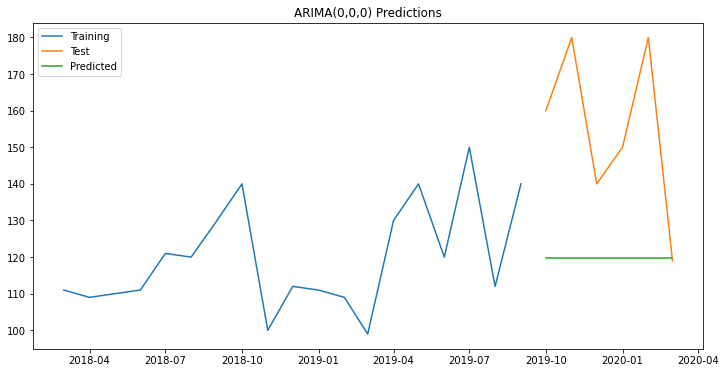

In [29]:
# Plot the predicted forecast against the training & test subsets
plt.figure(figsize=(12,6))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(pred, label='Predicted')
plt.title('ARIMA(0,0,0) Predictions')
plt.legend(loc="upper left")
plt.show()

In [30]:
# Evaluate forecast using mean absolute error
MAE = mean_absolute_error(test, pred)
MAE_rounded = round(MAE, 3)

# Evaluate forecast using root mean squared error
RMSE = mean_squared_error(test, pred, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Evaluate forecast using mean absolute scaled error (w/non-seasonal naive forecast)
#def mase(y_test, y_pred, y_naive):
#    e_t = y_test - y_pred
#    scale = mean_absolute_error(y_test, y_naive)
#    return np.mean(np.abs(e_t / scale))
#MASE = mase(test, pred, df2[18:24])
#MASE_rounded = round(MASE, 3)

# Create a dataframe containing all the error calculations
model = ['ARIMA(0,0,0)']
df_errors = pd.DataFrame({'Model':model})
df_errors['MAE'] = MAE_rounded
df_errors['RMSE'] = RMSE_rounded
df_errors['MAPE'] = MAPE_string
#df_errors['MASE'] = MASE_rounded
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%


# Exponential Smoothing

### Simple Exponential Smoothing
Used because there are only a few data points.

In [31]:
# Create the training & testing subsets
train = df2[0:19]
test = df2[19:]

In [32]:
# Build the simple exponential smooting models & use them to make predictions for the next 6 months
model = SimpleExpSmoothing(np.asarray(train))

fit1 = model.fit() # Auto-optimized smoothing level
pred1 = fit1.forecast(6)
fit2 = model.fit(smoothing_level=0.2)
pred2 = fit2.forecast(6)
fit3 = model.fit(smoothing_level=0.5)
pred3 = fit3.forecast(6)
fit4 = model.fit(smoothing_level=1.35)
pred4 = fit4.forecast(6)

/home/stephen/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


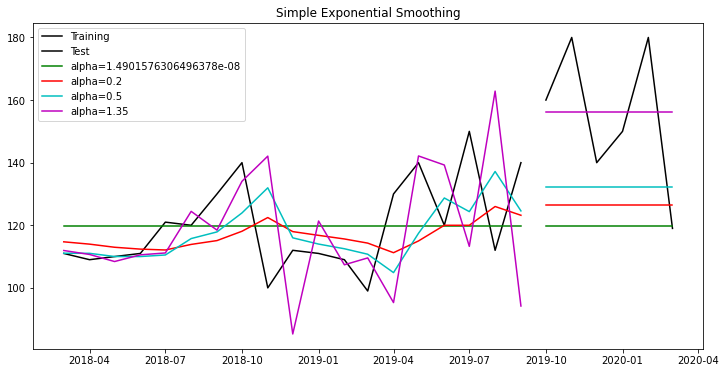

In [33]:
# Plot all the predictions against the actual values
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(train.index, train, color='k', label='Training')
ax.plot(test.index, test, color='k', label='Test')
for p, f, c in zip((pred1, pred2, pred3, pred4), (fit1, fit2, fit3, fit4), ('g','r','c', 'm')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha=" + str(f.params['smoothing_level']), color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend(loc="upper left")
plt.show()

In [34]:
# Evaluate 'pred1' forecast using mean absolute error
MAE = mean_absolute_error(test, pred1)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred1' forecast using root mean squared error
RMSE = mean_squared_error(test, pred1, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred1' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred1)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred1' to 'df_errors'
row_to_add = ['SES; alpha = 0.0', MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%


In [35]:
# Evaluate 'pred2' forecast using mean absolute error
MAE = mean_absolute_error(test, pred2)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred2' forecast using root mean squared error
RMSE = mean_squared_error(test, pred2, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred2' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred2)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred2' to 'df_errors'
row_to_add = ['SES; alpha = 0.2', MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%


In [36]:
# Evaluate 'pred3' forecast using mean absolute error
MAE = mean_absolute_error(test, pred3)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred3' forecast using root mean squared error
RMSE = mean_squared_error(test, pred3, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred3' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred3)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred3' to 'df_errors'
row_to_add = ['SES; alpha = 0.5', MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%


In [37]:
# Evaluate 'pred4' forecast using mean absolute error
MAE = mean_absolute_error(test, pred4)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred4' forecast using root mean squared error
RMSE = mean_squared_error(test, pred4, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred4' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred4)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred4' to 'df_errors'
row_to_add = ['SES; alpha = 1.35', MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%


### Holt's Linear Smoothing
You're supposed to use this model when there is a linear trend in the data & no seasonality. You used it here just to try it out.

In [38]:
# Create the training & testing subsets
train = df2[0:19]
test = df2[19:]

In [39]:
# Build Holt's linear smoothing models & use them to make predictions for the next 6 months
model = Holt(np.asarray(train))

fit1 = model.fit(optimized=True) # Auto-optimized
pred1 = fit1.forecast(6)
fit2 = model.fit(smoothing_level=0.3, smoothing_trend=0.05)
pred2 = fit2.forecast(6)
fit3 = model.fit(smoothing_level=0.3, smoothing_trend=0.2)
pred3 = fit3.forecast(6)
fit4 = model.fit(smoothing_level=1.1, smoothing_trend=0.1)
pred4 = fit4.forecast(6)

/home/stephen/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


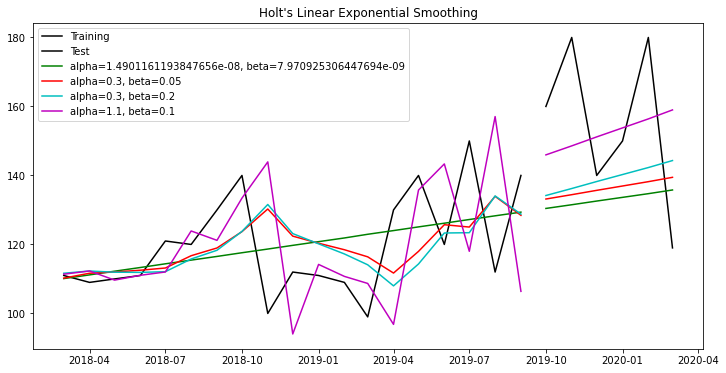

In [40]:
# Plot all the predictions against the actual values
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index, train, color='k', label='Training')
ax.plot(test.index, test, color='k', label='Test')
for p, f, c in zip((pred1, pred2, pred3, pred4),(fit1, fit2, fit3, fit4),('g','r','c', 'm')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha=" + str(f.params['smoothing_level']) + ", beta=" + str(f.params['smoothing_trend']), color=c)
plt.title("Holt's Linear Exponential Smoothing")
plt.legend(loc="upper left")
plt.show()

Weakness of exponential smoothing is that it only accurately forecasts one time period ahead. All other future forecasted time periods will be similar to the first forecasted value. So, ask if you should build a model that forecasts one value at a time.

In [41]:
# Evaluate 'pred1' forecast using mean absolute error
MAE = mean_absolute_error(test, pred1)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred1' forecast using root mean squared error
RMSE = mean_squared_error(test, pred1, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred1' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred1)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred1' to 'df_errors'
row_to_add = ["Holt's Linear; alpha = 0.0; beta = 0.0", MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%


In [42]:
# Evaluate 'pred2' forecast using mean absolute error
MAE = mean_absolute_error(test, pred2)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred2' forecast using root mean squared error
RMSE = mean_squared_error(test, pred2, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred2' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred2)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred2' to 'df_errors'
row_to_add = ["Holt's Linear; alpha = 0.3; beta = 0.05", MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%


In [43]:
# Evaluate 'pred3' forecast using mean absolute error
MAE = mean_absolute_error(test, pred3)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred3' forecast using root mean squared error
RMSE = mean_squared_error(test, pred3, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred3' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred3)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred3' to 'df_errors'
row_to_add = ["Holt's Linear; alpha = 0.3; beta = 0.2", MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%


In [44]:
# Evaluate 'pred4' forecast using mean absolute error
MAE = mean_absolute_error(test, pred4)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred4' forecast using root mean squared error
RMSE = mean_squared_error(test, pred4, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred4' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred4)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred4' to 'df_errors'
row_to_add = ["Holt's Linear; alpha = 1.1; beta = 0.1", MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%


### Holt's Damped Trend
Used because in Holt's Linear Smoothing, the trend is constant in the future, increasing or decreasing indefinitely. This can be problematic for long forecast horizons. The damped trend method is therefore a method which adds a dampening parameter so that the trend converges to a constant value in the future (it flattens the trend).

The multiplicative version is used because the peaks & troughs do not remain the same, regardless of trend.

In [45]:
# Create the training & testing subsets
train = df2[0:19]
test = df2[19:]

In [46]:
# Build Holt's damped trend models & use them to make predictions for the next 6 months
#model1 = ExponentialSmoothing(np.asarray(train), trend='mul', seasonal=None)
model = ExponentialSmoothing(np.asarray(train), trend='mul', seasonal=None, damped_trend=True)

fit1 = model.fit() # Auto-optimized
pred1 = fit1.forecast(6)
fit2 = model.fit(smoothing_level=1.1, smoothing_trend=0.1) # alpha & beta from the best Holt's Linear model
pred2 = fit2.forecast(6)

/home/stephen/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


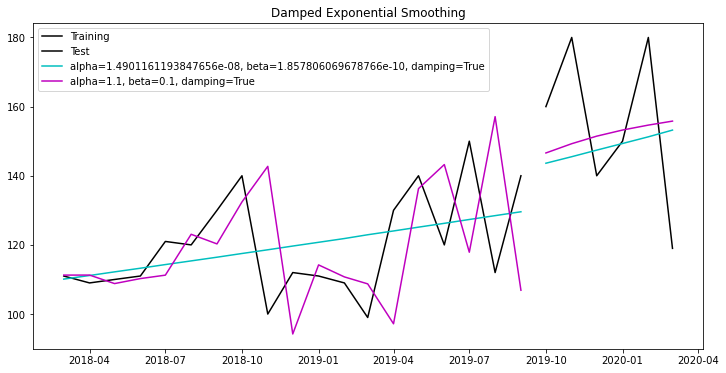

In [47]:
# Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index, train, color='k', label='Training')
ax.plot(test.index, test, color='k', label='Test')
for p, f, c in zip((pred1, pred2),(fit1, fit2),('c','m')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha=" + str(f.params['smoothing_level']) + ", beta=" + str(f.params['smoothing_trend']) + ", damping="+str(True if f.params['damping_trend']>0 else False), color=c)
plt.title("Damped Exponential Smoothing");
plt.legend(loc="upper left")
plt.show()

In [48]:
# Evaluate 'pred1' forecast using mean absolute error
MAE = mean_absolute_error(test, pred1)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred1' forecast using root mean squared error
RMSE = mean_squared_error(test, pred1, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred1' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred1)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred1' to 'df_errors'
row_to_add = ["Holt's Damped; alpha = 0.0; beta = 0.0", MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


In [49]:
# Evaluate 'pred2' forecast using mean absolute error
MAE = mean_absolute_error(test, pred2)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred2' forecast using root mean squared error
RMSE = mean_squared_error(test, pred2, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred2' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred2)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred2' to 'df_errors'
row_to_add = ["Holt's Damped; alpha = 1.1; beta = 0.1", MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


### Holt-Winters Seasonal

In [50]:
# Create the training & testing subsets
train = df2[0:19]
test = df2[19:]

In [52]:
# Build Holt-Winters seasonal models & use them to make predictions for the next 6 months
model1 = ExponentialSmoothing(train, trend="mul", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12)
model3 = ExponentialSmoothing(train, trend="mul", seasonal="add", seasonal_periods=12, damped_trend=True)
model4 = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12, damped_trend=True)

fit1 = model1.fit() # Auto-optimized
pred1 = fit1.forecast(6)
fit2 = model1.fit(smoothing_level=1.1, smoothing_trend=0.1)
pred2 = fit2.forecast(6)

fit3 = model2.fit() # Auto-optimized
pred3 = fit3.forecast(6)
fit4 = model2.fit(smoothing_level=1.1, smoothing_trend=0.1)
pred4 = fit4.forecast(6)

fit5 = model3.fit() # Auto-optimized
pred5 = fit5.forecast(6)
fit6 = model3.fit(smoothing_level=1.1, smoothing_trend=0.1)
pred6 = fit6.forecast(6)

fit7 = model4.fit() # Auto-optimized
pred7 = fit7.forecast(6)
fit8 = model4.fit(smoothing_level=1.1, smoothing_trend=0.1)
pred8 = fit8.forecast(6)

/home/stephen/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/stephen/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/stephen/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/stephen/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


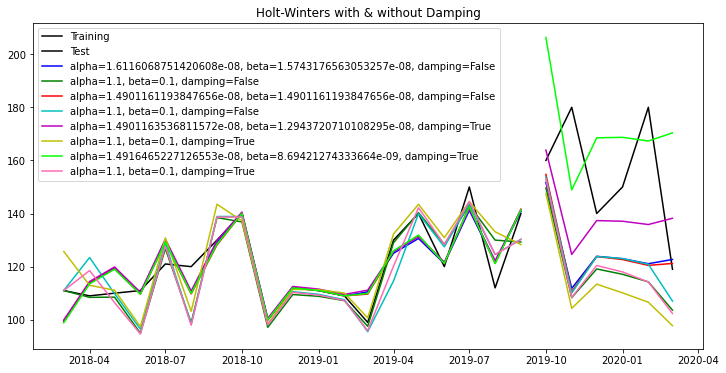

In [53]:
# Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index, train, color='k', label='Training')
ax.plot(test.index, test, color='k', label='Test')
for p, f, c in zip((pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8), 
                   (fit1, fit2, fit3, fit4, fit5, fit6, fit7, fit8),
                   ('b', 'g', 'r', 'c', 'm', 'y', 'lime', 'hotpink')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha=" + str(f.params['smoothing_level']) + ", beta=" + str(f.params['smoothing_trend']) + ", damping="+str(True if f.params['damping_trend']>0 else False), color=c)
plt.title("Holt-Winters with & without Damping");
plt.legend(loc="upper left")
plt.show()

In [54]:
# Evaluate 'pred1' forecast using mean absolute error
MAE = mean_absolute_error(test, pred1)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred1' forecast using root mean squared error
RMSE = mean_squared_error(test, pred1, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred1' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred1)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred1' to 'df_errors'
row_to_add = ["Holt-Winters; mul/add; alpha = 0.0; beta = 0.0; damping = False", 
              MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


In [55]:
# Evaluate 'pred2' forecast using mean absolute error
MAE = mean_absolute_error(test, pred2)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred2' forecast using root mean squared error
RMSE = mean_squared_error(test, pred2, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred2' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred2)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred2' to 'df_errors'
row_to_add = ["Holt-Winters; mul/add; alpha = 1.1; beta = 0.1; damping = False", 
              MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


In [56]:
# Evaluate 'pred3' forecast using mean absolute error
MAE = mean_absolute_error(test, pred3)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred3' forecast using root mean squared error
RMSE = mean_squared_error(test, pred3, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred3' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred3)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred3' to 'df_errors'
row_to_add = ["Holt-Winters; mul/mul; alpha = 0.0; beta = 0.0; damping = False", 
              MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


In [57]:
# Evaluate 'pred4' forecast using mean absolute error
MAE = mean_absolute_error(test, pred4)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred4' forecast using root mean squared error
RMSE = mean_squared_error(test, pred4, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred4' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred4)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred4' to 'df_errors'
row_to_add = ["Holt-Winters; mul/mul; alpha = 1.1; beta = 0.1; damping = False", 
              MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


In [58]:
# Evaluate 'pred5' forecast using mean absolute error
MAE = mean_absolute_error(test, pred5)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred5' forecast using root mean squared error
RMSE = mean_squared_error(test, pred5, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred5' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred5)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred5' to 'df_errors'
row_to_add = ["Holt-Winters; mul/add; alpha = 0.0; beta = 0.0; damping = True", 
              MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


In [59]:
# Evaluate 'pred6' forecast using mean absolute error
MAE = mean_absolute_error(test, pred6)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred6' forecast using root mean squared error
RMSE = mean_squared_error(test, pred6, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred6' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred6)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred6' to 'df_errors'
row_to_add = ["Holt-Winters; mul/add; alpha = 1.1; beta = 0.1; damping = True", 
              MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


In [60]:
# Evaluate 'pred7' forecast using mean absolute error
MAE = mean_absolute_error(test, pred7)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred7' forecast using root mean squared error
RMSE = mean_squared_error(test, pred7, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred7' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred7)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred7' to 'df_errors'
row_to_add = ["Holt-Winters; mul/mul; alpha = 0.0; beta = 0.0; damping = True", 
              MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


In [61]:
# Evaluate 'pred8' forecast using mean absolute error
MAE = mean_absolute_error(test, pred8)
MAE_rounded = round(MAE, 3)

# Evaluate 'pred8' forecast using root mean squared error
RMSE = mean_squared_error(test, pred8, squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'pred8' forecast using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, pred8)
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'pred8' to 'df_errors'
row_to_add = ["Holt-Winters; mul/mul; alpha = 1.1; beta = 0.1; damping = True", 
              MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


# Facebook Prophet

In [70]:
# Create a new training subset dataframe whose columns have been renamed to 
# 'ds' ('Month') & 'y' ('Sales Product 1') to comply with Prophet requirements
df_prophet = df[:19].rename(columns={'Month': 'ds', 'Sales Product 1': 'y'})

# Create the test subset
test = df2[19:]

In [71]:
# Initiate a new Prophet object
m = Prophet()

# Fit the model to df_prod
m.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.


In [72]:
# Set the number of periods to be forecasted.
# In this case we want to predict the next 6 periods.
# Set 'freq' equal to 'MS' for Month Start.
future = m.make_future_dataframe(periods=6, freq='MS')
future

,ds
0,2018-03-01
1,2018-04-01
2,2018-05-01
3,2018-06-01
4,2018-07-01
5,2018-08-01
6,2018-09-01
7,2018-10-01
8,2018-11-01
9,2018-12-01


In [73]:
# Use 'predict' to assign each row in 'future' a predicted value, which it names yhat.
# 'predict' also adds 11 uncertainty intervals.
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-03-01,110.094146,93.145684,128.090407
1,2018-04-01,111.182485,95.338066,126.252896
2,2018-05-01,112.235716,95.510252,129.712215
3,2018-06-01,113.324055,96.226384,129.775975
4,2018-07-01,114.377287,97.917381,131.666314
5,2018-08-01,115.465626,99.537111,131.527379
6,2018-09-01,116.553965,101.022222,133.147664
7,2018-10-01,117.607196,100.955966,134.495425
8,2018-11-01,118.695535,101.671178,133.905849
9,2018-12-01,119.748766,101.828815,137.374473


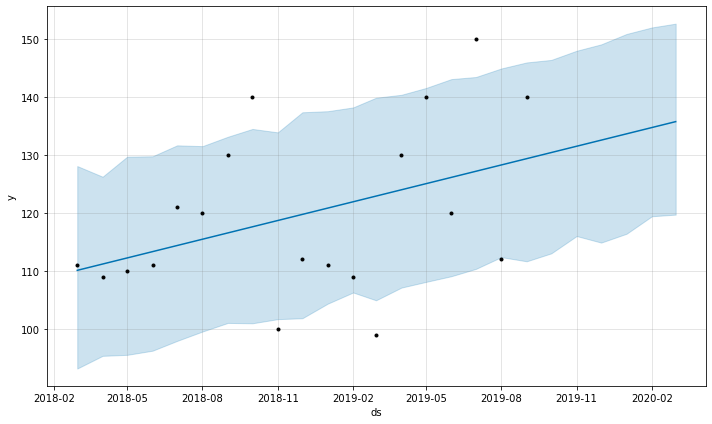

In [74]:
# Plot the forecast
fig1 = m.plot(forecast)

In [76]:
# Evaluate 'forecast' predictions using mean absolute error
MAE = mean_absolute_error(test, forecast['yhat'][19:])
MAE_rounded = round(MAE, 3)

# Evaluate 'forecast' predictions using root mean squared error
RMSE = mean_squared_error(test, forecast['yhat'][19:], squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'forecast' predictions using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, forecast['yhat'][19:])
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'forecast' to 'df_errors'
row_to_add = ["Prophet Default", MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


In [83]:
#help(Prophet)

In [77]:
# Build a new, tuned model
m2 = Prophet(changepoint_range=0.9, 
            seasonality_mode='multiplicative', 
            changepoint_prior_scale=0.08, 
            interval_width=0.95)
m2.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
m2.fit(df_prophet)
future2 = m2.make_future_dataframe(periods=6, freq='MS')
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.


,ds,yhat,yhat_lower,yhat_upper
0,2018-03-01,111.016278,85.856670,136.586678
1,2018-04-01,111.342238,86.661106,135.591757
2,2018-05-01,113.040263,89.489448,138.615703
3,2018-06-01,113.353531,88.089955,137.949170
4,2018-07-01,115.064248,89.419770,140.163698
5,2018-08-01,115.364824,89.209803,139.421631
6,2018-09-01,115.625195,89.995280,139.343679
7,2018-10-01,117.376117,93.939481,140.767024
8,2018-11-01,117.623324,94.055830,142.912404
9,2018-12-01,119.387410,93.783435,146.352333


In [79]:
# Evaluate 'forecast2' predictions using mean absolute error
MAE = mean_absolute_error(test, forecast2['yhat'][19:])
MAE_rounded = round(MAE, 3)

# Evaluate 'forecast2' predictions using root mean squared error
RMSE = mean_squared_error(test, forecast2['yhat'][19:], squared=False)
RMSE_rounded = round(RMSE, 3)

# Evaluate 'forecast2' predictions using mean absolute percentage error
def mape(actuals, preds): 
    a, p = np.array(actuals), np.array(preds)
    return np.mean(np.abs((a - p) / a)) * 100
MAPE = mape(test, forecast2['yhat'][19:])
MAPE_rounded = round(MAPE, 3)
MAPE_string = str(MAPE_rounded) + '%'

# Add the error measures of 'forecast2' to 'df_errors'
row_to_add = ["Prophet Tuned", MAE_rounded, RMSE_rounded, MAPE_string]
df_errors.loc[len(df_errors.index)] = row_to_add
df_errors

,Model,MAE,RMSE,MAPE
0,"ARIMA(0,0,0)",35.342,41.254,21.232%
1,SES; alpha = 0.0,35.342,41.254,21.232%
2,SES; alpha = 0.2,30.795,35.633,18.644%
3,SES; alpha = 0.5,26.970,31.275,16.467%
4,SES; alpha = 1.35,18.500,21.716,12.617%
5,Holt's Linear; alpha = 0.0; beta = 0.0,27.316,31.305,16.156%
6,Holt's Linear; alpha = 0.3; beta = 0.05,25.340,29.303,14.942%
7,Holt's Linear; alpha = 0.3; beta = 0.2,24.021,28.120,14.1%
8,Holt's Linear; alpha = 1.1; beta = 0.1,20.672,24.087,12.532%
9,Holt's Damped; alpha = 0.0; beta = 0.0,20.316,24.184,12.522%


# Export 'df_errors' to Excel

In [80]:
# Set the 'Model' column as the index of 'df_errors'
df_errors.set_index('Model', inplace=True)

In [82]:
# Write 'df_errors' to an Excel spreadsheet
df_errors.to_excel('/home/stephen/Desktop/ForecastingCaseStudy/SalesProduct1_Accuracy.xlsx', index = True)